In [39]:
import pandas as pd
from scipy.stats import t
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
from scipy.stats import norm
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
from typing import List
import matplotlib.pyplot as plt
import math
from scipy.stats import ttest_ind


# Testes estátisticos

- T student

In [29]:
from scipy.stats import t as t_student
import numpy as np
import matplotlib.pyplot as plt



In [30]:
amostra = [37.27, 36.42, 34.84, 34.60, 37.49, 
           36.53, 35.49, 36.90, 34.52, 37.30, 
           34.99, 36.55, 36.29, 36.06, 37.42, 
           34.47, 36.70, 35.86, 36.80, 36.92, 
           37.04, 36.39, 37.32, 36.64, 35.45]   

In [31]:

amostra = pd.DataFrame(amostra, columns=['Amostra'])
media_amostra = amostra.mean()[0]
desvio_padrao_amostra = amostra.std()[0]
desvio_padrao_amostra

/tmp/ipykernel_41290/1571402486.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  media_amostra = amostra.mean()[0]
/tmp/ipykernel_41290/1571402486.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  desvio_padrao_amostra = amostra.std()[0]


0.9667535018469455

In [32]:
media = 37
significancia = 0.05
confianca = 1 - significancia
n = 25
graus_de_liverdade = n - 1

In [33]:
t_alpha = t_student.ppf(confianca, graus_de_liverdade)
t_alpha

1.7108820799094275

In [34]:
t = (media_amostra - media) / (desvio_padrao_amostra / np.sqrt(n))
t


-3.876893119952081

In [35]:
t >= t_alpha

False

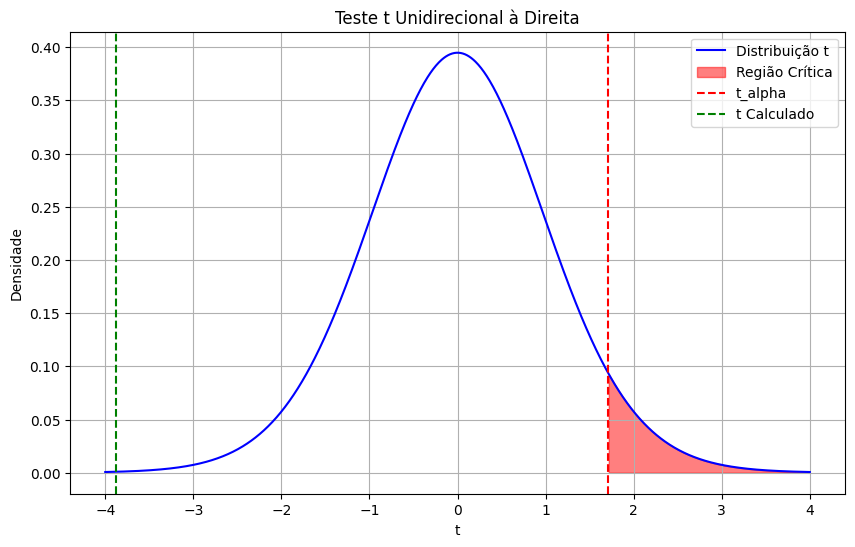

In [36]:
x = np.linspace(-4, 4, 1000)
y = t_student.pdf(x, graus_de_liverdade)

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', label='Distribuição t')
plt.fill_between(x, y, where=(x >= t_alpha), color='red', alpha=0.5, label='Região Crítica')
plt.axvline(x=t_alpha, color='r', linestyle='--', label='t_alpha')
plt.axvline(x=t, color='g', linestyle='--', label='t Calculado')
plt.title('Teste t Unidirecional à Direita')
plt.xlabel('t')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
def obter_resumo(tipo_imovel: str, bairro: str = None, banheiro: int = None, quartos: int = None) -> pd.DataFrame:
    query = f'  tipo_imovel == "{tipo_imovel}"'
    if bairro is not None:
        query += f' and bairro_teste == "{bairro}"  '
    if banheiro is not None:
        query += f' and banheiro == {banheiro} '
    if quartos is not None:
        query += f' and quarto == {quartos} '
    base_original = pd.read_parquet('../data/processed/base_casa.parquet')
    base_original = base_original.query(query)
    return base_original

In [46]:
base_original = obter_resumo(tipo_imovel='Apartamento')
base_original['quarto'] = base_original['quarto'].str.replace('1 Quarto', '1').astype('int32')
base_original['garagem'] = base_original['garagem'].str.replace('--', '0').astype('int32')
base_original['metragem'] = base_original['metragem'].astype('int32')
base_original[['banheiro', 'garagem']] = base_original[['banheiro', 'garagem']].astype('int32')
base_original

,tipo_imovel,nome,preco,metragem,quarto,banheiro,garagem,ID_CASA,bairro_teste
0,Apartamento,"Apartamento com 2 Quartos à Venda, 65m²",310000.00,65,2,2,1,2699716579,Jardim Botânico
2,Apartamento,"Apartamento com 2 Quartos à Venda, 71m²",403500.00,71,2,2,2,2690493538,Bonfim Paulista
3,Apartamento,"Apartamento com 2 Quartos à Venda, 54m²",290000.00,54,2,2,1,2667652105,Nova Aliança
4,Apartamento,"Apartamento com 2 Quartos à Venda, 45m²",166420.00,45,2,1,1,2682840782,Conjunto Habitacional Jardim Das Palmeiras
5,Apartamento,"Apartamento com 2 Quartos à Venda, 64m²",370000.00,64,2,2,2,2688027260,Vila Ana Maria
...,...,...,...,...,...,...,...,...,...
9967,Apartamento,"Apartamento com 3 Quartos à Venda, 81m²",540000.00,81,3,2,2,2696267182,Vila Do Golf
9968,Apartamento,"Apartamento com Quarto à Venda, 61m²",280000.00,61,1,1,1,2476716299,Centro
9969,Apartamento,"Apartamento com 3 Quartos à Venda, 83m²",375000.00,83,3,3,2,2693112449,Jardim São Luiz
9970,Apartamento,"Apartamento com 2 Quartos à Venda, 48m²",175000.00,48,2,1,1,2572455642,Lagoinha


In [47]:
base_original = base_original.drop_duplicates()
base_original.shape

(8395, 9)

In [49]:
bairros = [
    'Jardim Botânico',
    'Centro',
    'Nova Aliança',
    'Jardim Irajá',
    'Sumarezinho', 
    'Vila Monte Alegre', 
    'Bonfim Paulista',
    'Ribeirânia',
    'Campos Eliseos'
]
base_bairros = base_original[base_original['bairro_teste'].isin(bairros)]

In [56]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans
bairro = 'Ribeirânia'
base_temp = base_bairros.query(f'bairro_teste == "{bairro}"')
base_menor_area = base_temp.query('metragem <= 60').sample(n=27, random_state=101).preco
base_maior_area = base_temp.query('metragem > 60').sample(n=27, random_state=101).preco
base_menor_area.shape , base_maior_area.shape

test_menor_area = DescrStatsW(base_menor_area)
test_maior_area = DescrStatsW(base_maior_area)

test_preco = test_menor_area.get_compare(test_maior_area)

z, p_valor = test_preco.ztest_ind(alternative='larger', value=0)

z, p_valor

(-4.194767180685638, 0.9999863423996187)

In [59]:
p_valor < 0.05

False

In [63]:
#Exercicio da aula, teste parametricos com n <= 30 usando o t_student
from scipy.stats import t as t_student
import numpy as np
import pandas as pd

shampoo_Novo = pd.Series([3.4, 4.9, 2.8, 5.5, 3.7, 2.5, 4.3, 4.6, 3.7, 3.4])
shampoo_Antigo = pd.Series([0.3, 1.2, 1.2, 1.7, 1.1, 0.6, 1.2, 1.5, 0.5, 0.7])

media_A = shampoo_Novo.mean()
desvio_padrao_A = shampoo_Novo.std()

media_B = shampoo_Antigo.mean()
desvio_padrao_B = shampoo_Antigo.std()

significancia = 0.05
confianca = 1 - significancia
n_A = len(shampoo_Novo)
n_B = len(shampoo_Antigo)
D_0 = 2

graus_de_liberdade = n_A + n_B - 2

t_alpha = t_student.ppf(confianca, graus_de_liberdade)

numerador = (media_A - media_B) - D_0
denominador = np.sqrt((desvio_padrao_A ** 2 / n_A) + (desvio_padrao_B ** 2 / n_B))
t = numerador / denominador

print('t =', round(t, 4))

if(t >= t_alpha):
    print('Rejeitar H0')
else:
    print('Aceitar H0')

t = 2.6646
Rejeitar H0


t = 2.6646
p-valor = 0.0079
graus de liberdade = 18.0
Rejeitar H0


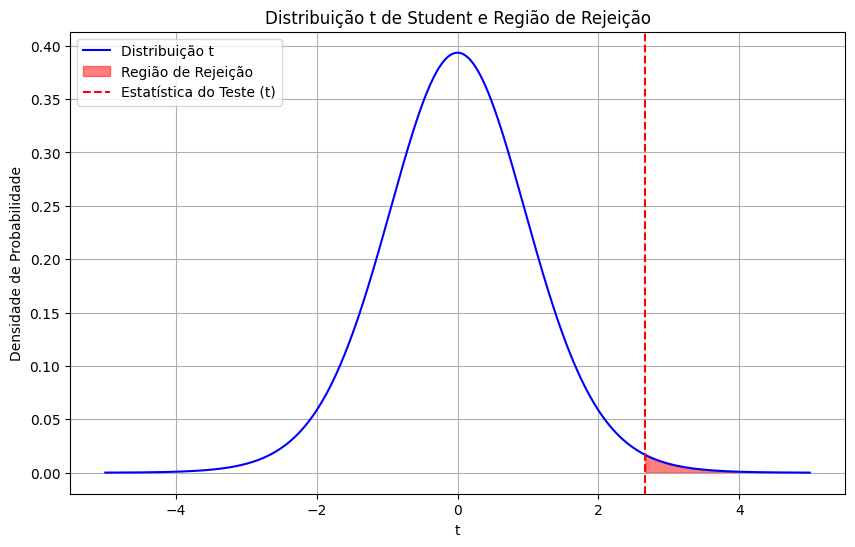

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.weightstats import DescrStatsW

# Dados
shampoo_Novo = pd.Series([3.4, 4.9, 2.8, 5.5, 3.7, 2.5, 4.3, 4.6, 3.7, 3.4])
shampoo_Antigo = pd.Series([0.3, 1.2, 1.2, 1.7, 1.1, 0.6, 1.2, 1.5, 0.5, 0.7])

# Significância
significancia = 0.05

# Teste
test_A = DescrStatsW(shampoo_Novo)
test_B = DescrStatsW(shampoo_Antigo)
test = test_A.get_compare(test_B)

t, p_valor, df = test.ttest_ind(alternative='larger', value=2)

print('t =', round(t, 4))
print('p-valor =', round(p_valor, 4))
print('graus de liberdade =', df)

# Decisão
if p_valor <= significancia:
    print('Rejeitar H0')
else:
    print('Aceitar H0')

# Gráfico
x = np.linspace(-5, 5, 1000)
y = stats.t.pdf(x, df)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', label='Distribuição t')
plt.fill_between(x, y, where=(x > t), color='red', alpha=0.5, label='Região de Rejeição')
plt.axvline(x=t, color='r', linestyle='--', label='Estatística do Teste (t)')
plt.title('Distribuição t de Student e Região de Rejeição')
plt.xlabel('t')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True)
plt.show()


t = 2.6646
p-valor = 0.0079
graus de liberdade = 18.0
Rejeitar H0


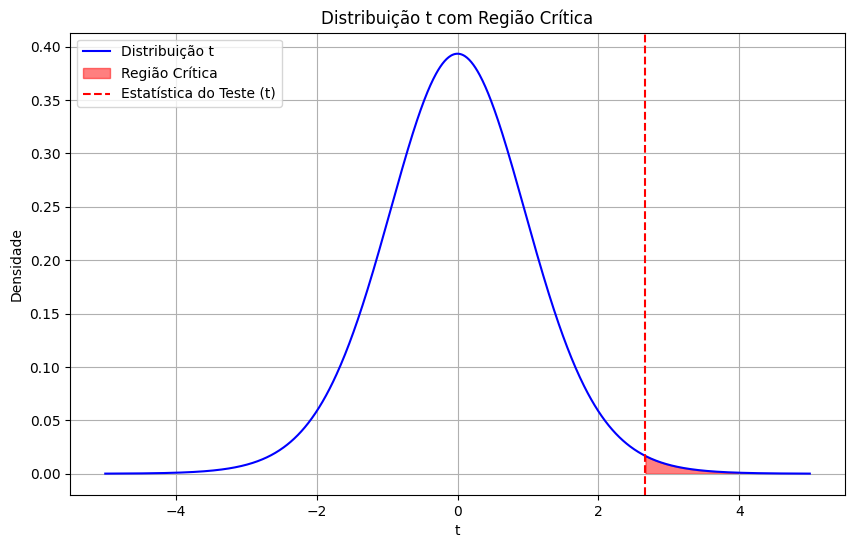

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.weightstats import DescrStatsW

# Dados
shampoo_Novo = pd.Series([3.4, 4.9, 2.8, 5.5, 3.7, 2.5, 4.3, 4.6, 3.7, 3.4])
shampoo_Antigo = pd.Series([0.3, 1.2, 1.2, 1.7, 1.1, 0.6, 1.2, 1.5, 0.5, 0.7])

significancia = 0.05

# Teste t de Student
test_A = DescrStatsW(shampoo_Novo)
test_B = DescrStatsW(shampoo_Antigo)
test = test_A.get_compare(test_B)

t, p_valor, df = test.ttest_ind(alternative='larger', value=2)

print('t =', round(t, 4))
print('p-valor =', round(p_valor, 4))
print('graus de liberdade =', df)

if(p_valor <= significancia):
    print('Rejeitar H0')
else:
    print('Aceitar H0')

# Gráfico da distribuição t com a cauda à direita
x = np.linspace(-5, 5, 1000)
y = stats.t.pdf(x, df)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', label='Distribuição t')
plt.fill_between(x, y, where=(x > t), color='red', alpha=0.5, label='Região Crítica')
plt.axvline(x=t, color='r', linestyle='--', label='Estatística do Teste (t)')
plt.title('Distribuição t com Região Crítica')
plt.xlabel('t')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.show()
